<a href="https://colab.research.google.com/github/nkofficial423/CODSOFT-/blob/main/TITANIC_SURVIVAL_PREDICTION_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic= pd.read_csv("tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic.shape

(418, 12)

**Data Analysis**



<Axes: xlabel='Survived', ylabel='count'>

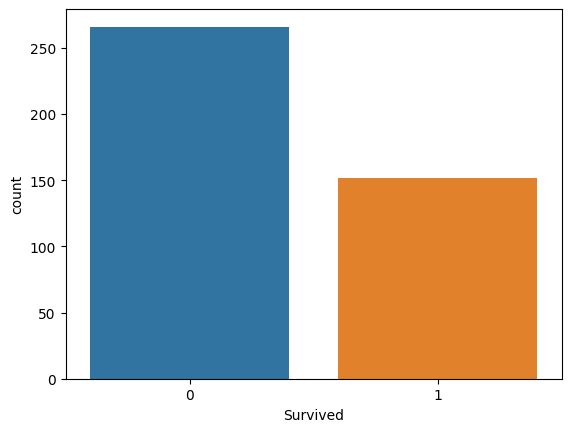

In [4]:
sns.countplot(x="Survived", data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

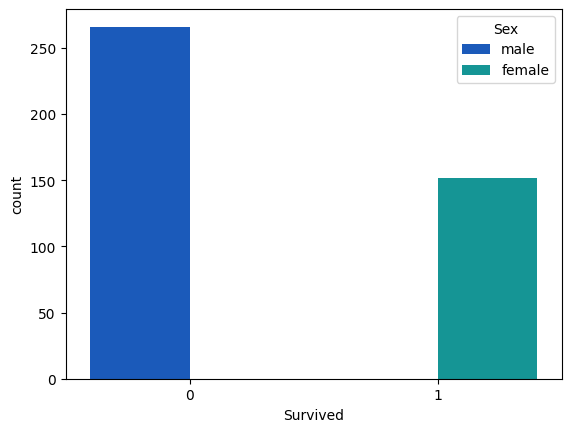

In [5]:
sns.countplot(x="Survived", hue="Sex", data=titanic, palette="winter")

<Axes: ylabel='Frequency'>

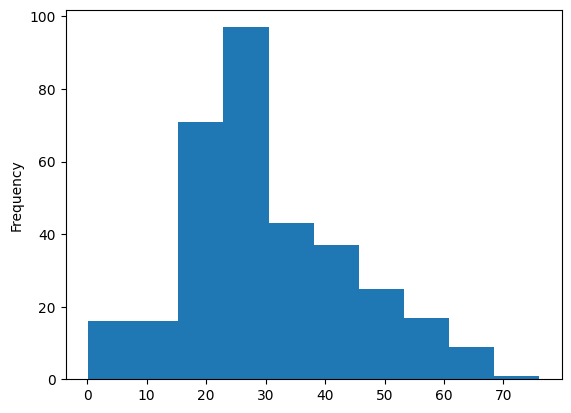

In [6]:
titanic["Age"].plot.hist()

<Axes: ylabel='Frequency'>

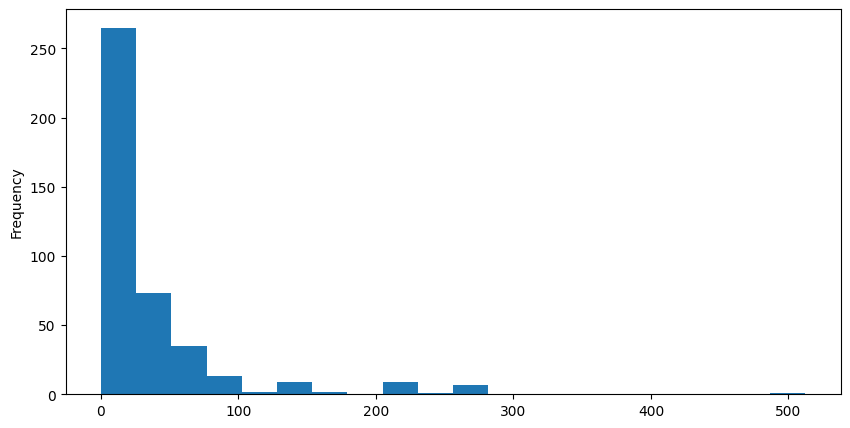

In [7]:
titanic["Fare"].plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

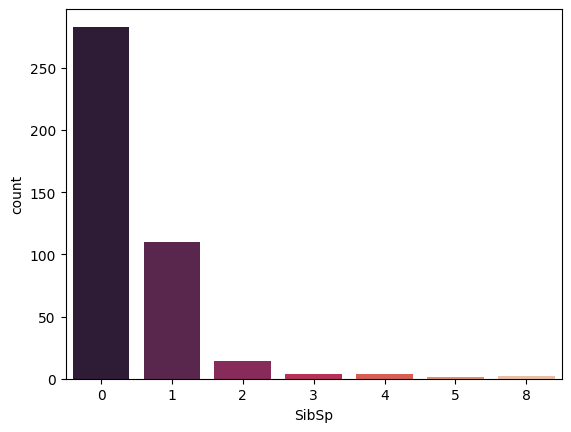

In [8]:
sns.countplot(x="SibSp", data=titanic, palette="rocket")

<Axes: ylabel='Frequency'>

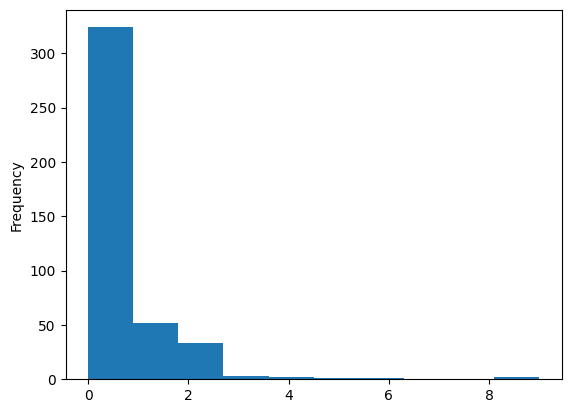

In [9]:
titanic["Parch"].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

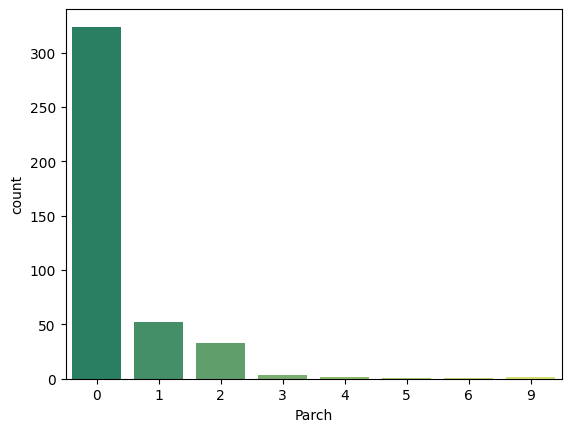

In [10]:
sns.countplot(x="Parch", data=titanic, palette="summer")

Data Wrangling

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

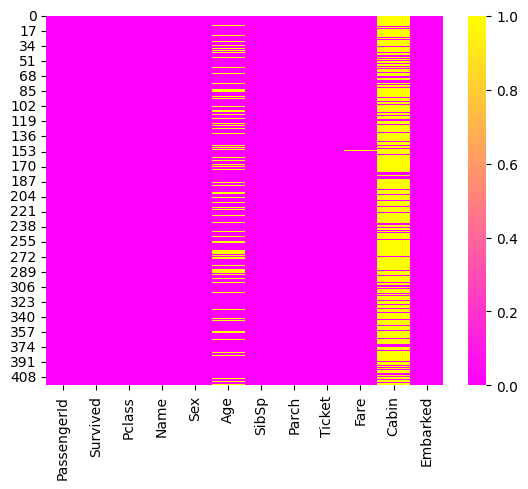

In [12]:
sns.heatmap(titanic.isnull(), cmap="spring")

<Axes: xlabel='Pclass', ylabel='Age'>

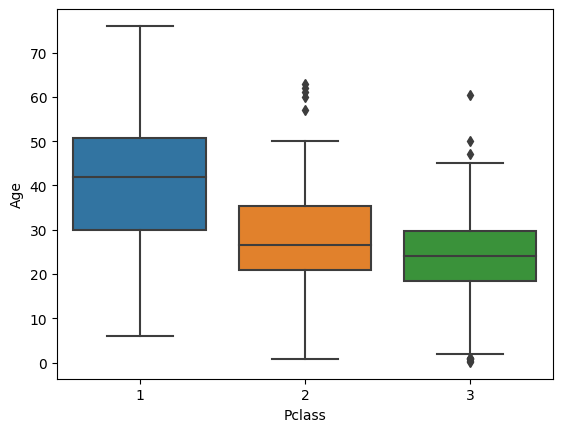

In [13]:
sns.boxplot(x="Pclass",y="Age", data=titanic)

In [14]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.drop("Cabin",axis=1, inplace=True)

In [15]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.dropna(inplace=True)

<Axes: >

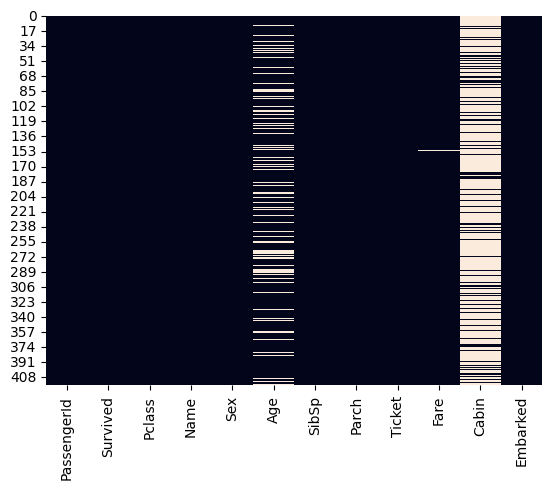

In [16]:
sns.heatmap(titanic.isnull(),cbar=False)

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
 titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [19]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [20]:
embark=pd.get_dummies(titanic["Embarked"])
embark.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [21]:
Pcl=pd.get_dummies(titanic["Pclass"],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,1
2,1,0


In [23]:
titanic.drop(["Name","PassengerId","Pclass","Ticket","Sex","Embarked"],axis=1, inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,Cabin
0,0,34.5,0,0,7.8292,NaN
1,1,47.0,1,0,7.0000,NaN
2,0,62.0,0,0,9.6875,NaN


**Training of Data**

In [ ]:
x=titanic.drop("Survived",axis=1)
y=titanic['Survived']

In [ ]:
x.columns = x.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=4)